In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm

### <p style="color:red;">1. CARGA DE DATOS</p>

Necesitamos extraer las PDs y LGDs estimadas, así como la EAD de diferentes datasets que hemos ido creando.

In [2]:
df_PD_lr = pd.read_csv('df_PD_lr_final.csv')
df_PD_rf = pd.read_csv('df_PD_rf_final.csv')
df_PD_xgb = pd.read_csv('df_PD_xgb_final.csv')
df_PD_nn = pd.read_csv('df_PD_nn_final.csv')
df_LGD = pd.read_csv('df_explot_LGD_estimada.csv')
df_EAD = pd.read_csv('features_explot_PD.csv')

Vamos a ir creando el dataset final con las variables que necesitamos para calcula la Pérdida Esperada y la Pérdida Inesperada necesaria para nuestra cartera.

In [3]:
df_final = pd.DataFrame()

In [4]:
df_final['PD_bucket_lr'] = df_PD_lr['default_media_bucket']
df_final['PD_cluster_lr'] = df_PD_lr['default_media_cluster']

df_final['PD_bucket_rf'] = df_PD_rf['default_media_bucket']
df_final['PD_cluster_rf'] = df_PD_rf['default_media_cluster']

df_final['PD_bucket_xgb'] = df_PD_xgb['default_media_bucket']
df_final['PD_cluster_xgb'] = df_PD_xgb['default_media_cluster']

df_final['PD_bucket_nn'] = df_PD_nn['default_media_bucket']
df_final['PD_cluster_nn'] = df_PD_nn['default_media_cluster']

df_final['LGD'] = df_LGD['LGD_estimada']

df_final['EAD'] = df_EAD['out_prncp']

In [5]:
df_final

,PD_bucket_lr,PD_cluster_lr,PD_bucket_rf,PD_cluster_rf,PD_bucket_xgb,PD_cluster_xgb,PD_bucket_nn,PD_cluster_nn,LGD,EAD
0,0.058727,0.085884,0.013882,0.017319,0.051101,0.046362,0.052489,0.057074,0.355584,35000.00
1,0.012093,0.013124,0.013822,0.013617,0.051101,0.046362,0.012457,0.011305,0.594654,8650.00
2,0.006116,0.004503,0.012024,0.007467,0.028573,0.057306,0.008201,0.007992,0.366030,4225.00
3,0.012093,0.013124,0.013822,0.014111,0.051101,0.046362,0.012457,0.014610,0.355584,10000.00
4,0.020571,0.019807,0.013882,0.017319,0.051101,0.046362,0.020294,0.021971,0.366030,20000.00
...,...,...,...,...,...,...,...,...,...,...
402884,0.000921,0.000748,0.006342,0.007467,0.006655,0.005537,0.001373,0.002449,0.378351,7055.47
402885,0.002450,0.001399,0.002554,0.001744,0.006655,0.005537,0.008201,0.007992,0.363061,16933.26
402886,0.015029,0.013124,0.012024,0.013342,0.003040,0.005537,0.004708,0.005158,0.586790,11155.50
402887,0.015029,0.015310,0.013813,0.013617,0.006655,0.005537,0.008201,0.007992,0.559435,10447.31


### <p style="color:red;">2. PÉRDIDA ESPERADA</p>

Calculamos la Pérdida Esperada de la cartera

In [6]:
df_final['PE_lr_bucket'] = (df_final['PD_bucket_lr']*df_final['LGD']*df_final['EAD']).astype(int)
df_final['PE_lr_cluster'] = (df_final['PD_cluster_lr']*df_final['LGD']*df_final['EAD']).astype(int)

df_final['PE_rf_bucket'] = (df_final['PD_bucket_rf']*df_final['LGD']*df_final['EAD']).astype(int)
df_final['PE_rf_cluster'] = (df_final['PD_cluster_rf']*df_final['LGD']*df_final['EAD']).astype(int)

df_final['PE_xgb_bucket'] = (df_final['PD_bucket_xgb']*df_final['LGD']*df_final['EAD']).astype(int)
df_final['PE_xgb_cluster'] = (df_final['PD_cluster_xgb']*df_final['LGD']*df_final['EAD']).astype(int)

df_final['PE_nn_bucket'] = (df_final['PD_bucket_nn']*df_final['LGD']*df_final['EAD']).astype(int)
df_final['PE_nn_cluster'] = (df_final['PD_cluster_nn']*df_final['LGD']*df_final['EAD']).astype(int)

In [7]:
df_final

,PD_bucket_lr,PD_cluster_lr,PD_bucket_rf,PD_cluster_rf,PD_bucket_xgb,PD_cluster_xgb,PD_bucket_nn,PD_cluster_nn,LGD,EAD,PE_lr_bucket,PE_lr_cluster,PE_rf_bucket,PE_rf_cluster,PE_xgb_bucket,PE_xgb_cluster,PE_nn_bucket,PE_nn_cluster
0,0.058727,0.085884,0.013882,0.017319,0.051101,0.046362,0.052489,0.057074,0.355584,35000.00,730,1068,172,215,635,576,653,710
1,0.012093,0.013124,0.013822,0.013617,0.051101,0.046362,0.012457,0.011305,0.594654,8650.00,62,67,71,70,262,238,64,58
2,0.006116,0.004503,0.012024,0.007467,0.028573,0.057306,0.008201,0.007992,0.366030,4225.00,9,6,18,11,44,88,12,12
3,0.012093,0.013124,0.013822,0.014111,0.051101,0.046362,0.012457,0.014610,0.355584,10000.00,42,46,49,50,181,164,44,51
4,0.020571,0.019807,0.013882,0.017319,0.051101,0.046362,0.020294,0.021971,0.366030,20000.00,150,144,101,126,374,339,148,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402884,0.000921,0.000748,0.006342,0.007467,0.006655,0.005537,0.001373,0.002449,0.378351,7055.47,2,1,16,19,17,14,3,6
402885,0.002450,0.001399,0.002554,0.001744,0.006655,0.005537,0.008201,0.007992,0.363061,16933.26,15,8,15,10,40,34,50,49
402886,0.015029,0.013124,0.012024,0.013342,0.003040,0.005537,0.004708,0.005158,0.586790,11155.50,98,85,78,87,19,36,30,33
402887,0.015029,0.015310,0.013813,0.013617,0.006655,0.005537,0.008201,0.007992,0.559435,10447.31,87,89,80,79,38,32,47,46


In [8]:
df_final['PE_nn_cluster'].round(0).sum()

54882808

In [9]:
46312049.0

46312049.0

### <p style="color:red;">2. PÉRDIDA INESPERADA (CAPITAL)</p>

Para el cálculo del capital regulatorio para carteras minoristas sin garantía, se emplean las siguientes fórmulas facilitadas por la CRR

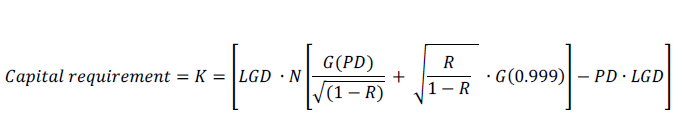

Donde:
- G es la función inversa de la normal estándar
- N es la función acumulada de la normal estándar
- R es la correlacción (definida a continuación)
- G(0.999) es el percentil 99.9% de la normal estándar

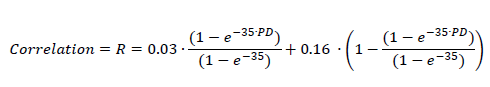

Definimos una función que aplique las 2 fórmulas anteriormente descritas

In [10]:
def capital(PD, LGD, EAD, aplicar_floor=True):
    
    # Evitar valores extremos que causan errores en la distribución normal
    PD = np.clip(PD, 1e-6, 1 - 1e-6)

    # Calcular correlación R con denominador normalizado
    denom = 1 - np.exp(-35)
    R = 0.03 * ((1 - np.exp(-35 * PD)) / denom) + 0.16 * (1 - ((1 - np.exp(-35 * PD)) / denom))

    # Z-scores
    G_PD = norm.ppf(PD)
    G_999 = norm.ppf(0.999)

    # Fórmula del capital unitario
    sqrt_1_minus_R = np.sqrt(1 - R)
    sqrt_R = np.sqrt(R)

    capital_unitario = LGD * norm.cdf((G_PD / sqrt_1_minus_R) + (sqrt_R / sqrt_1_minus_R) * G_999) - PD * LGD

    if aplicar_floor:
        capital_unitario *= 1.06  # aplicar floor regulatorio

    capital_total = capital_unitario * EAD

    return round(capital_total)

<p style="color:red;">2.1 REGRESIÓN LOGÍSTICA

**BUCKET**

In [11]:
df_final['capital_regulatorio_lr_bucket'] = df_final.apply(
    lambda row: capital(
        PD=row['PD_bucket_lr'],
        LGD=row['LGD'],
        EAD=row['EAD']
    ),
    axis=1
)

**CLUSTER**

In [12]:
df_final['capital_regulatorio_lr_cluster'] = df_final.apply(
    lambda row: capital(
        PD=row['PD_cluster_lr'],
        LGD=row['LGD'],
        EAD=row['EAD']
    ),
    axis=1
)

<p style="color:red;">2.2 RANDOM FOREST

**BUCKET**

In [13]:
df_final['capital_regulatorio_rf_bucket'] = df_final.apply(
    lambda row: capital(
        PD=row['PD_bucket_rf'],
        LGD=row['LGD'],
        EAD=row['EAD']
    ),
    axis=1
)

**CLUSTER**

In [14]:
df_final['capital_regulatorio_rf_cluster'] = df_final.apply(
    lambda row: capital(
        PD=row['PD_cluster_rf'],
        LGD=row['LGD'],
        EAD=row['EAD']
    ),
    axis=1
)

<p style="color:red;">2.3 XGBOOST

**BUCKET**

In [15]:
df_final['capital_regulatorio_xgb_bucket'] = df_final.apply(
    lambda row: capital(
        PD=row['PD_bucket_xgb'],
        LGD=row['LGD'],
        EAD=row['EAD']
    ),
    axis=1
)

**CLUSTER**

In [16]:
df_final['capital_regulatorio_xgb_cluster'] = df_final.apply(
    lambda row: capital(
        PD=row['PD_cluster_xgb'],
        LGD=row['LGD'],
        EAD=row['EAD']
    ),
    axis=1
)

<p style="color:red;">2.3 NEURAL NETWORKS

**BUCKET**

In [17]:
df_final['capital_regulatorio_nn_bucket'] = df_final.apply(
    lambda row: capital(
        PD=row['PD_bucket_nn'],
        LGD=row['LGD'],
        EAD=row['EAD']
    ),
    axis=1
)

**CLUSTER**

In [18]:
df_final['capital_regulatorio_nn_cluster'] = df_final.apply(
    lambda row: capital(
        PD=row['PD_cluster_nn'],
        LGD=row['LGD'],
        EAD=row['EAD']
    ),
    axis=1
)

In [19]:
df_final.head()

,PD_bucket_lr,PD_cluster_lr,PD_bucket_rf,PD_cluster_rf,PD_bucket_xgb,PD_cluster_xgb,PD_bucket_nn,PD_cluster_nn,LGD,EAD,...,PE_nn_bucket,PE_nn_cluster,capital_regulatorio_lr_bucket,capital_regulatorio_lr_cluster,capital_regulatorio_rf_bucket,capital_regulatorio_rf_cluster,capital_regulatorio_xgb_bucket,capital_regulatorio_xgb_cluster,capital_regulatorio_nn_bucket,capital_regulatorio_nn_cluster
0,0.058727,0.085884,0.013882,0.017319,0.051101,0.046362,0.052489,0.057074,0.355584,35000.0,...,653,710,1584,1695,1219,1308,1561,1546,1565,1579
1,0.012093,0.013124,0.013822,0.013617,0.051101,0.046362,0.012457,0.011305,0.594654,8650.0,...,64,58,479,494,503,501,645,639,485,467
2,0.006116,0.004503,0.012024,0.007467,0.028573,0.057306,0.008201,0.007992,0.366030,4225.0,...,12,12,105,89,144,117,182,196,122,121
3,0.012093,0.013124,0.013822,0.014111,0.051101,0.046362,0.012457,0.014610,0.355584,10000.0,...,44,51,331,342,348,350,446,442,335,355
4,0.020571,0.019807,0.013882,0.017319,0.051101,0.046362,0.020294,0.021971,0.366030,20000.0,...,148,160,805,798,717,770,918,910,803,818


In [20]:
df_final['capital_regulatorio_xgb_cluster'].sum()

195149003

In [21]:
df_final.columns

Index(['PD_bucket_lr', 'PD_cluster_lr', 'PD_bucket_rf', 'PD_cluster_rf',
       'PD_bucket_xgb', 'PD_cluster_xgb', 'PD_bucket_nn', 'PD_cluster_nn',
       'LGD', 'EAD', 'PE_lr_bucket', 'PE_lr_cluster', 'PE_rf_bucket',
       'PE_rf_cluster', 'PE_xgb_bucket', 'PE_xgb_cluster', 'PE_nn_bucket',
       'PE_nn_cluster', 'capital_regulatorio_lr_bucket',
       'capital_regulatorio_lr_cluster', 'capital_regulatorio_rf_bucket',
       'capital_regulatorio_rf_cluster', 'capital_regulatorio_xgb_bucket',
       'capital_regulatorio_xgb_cluster', 'capital_regulatorio_nn_bucket',
       'capital_regulatorio_nn_cluster'],
      dtype='object')

Preparar los datos para el gráfico

In [22]:
modelos = ['lr', 'rf', 'xgb', 'nn']
tipos = ['bucket', 'cluster']

# Crear diccionario resumen
resumen = {}

for modelo in modelos:
    fila = {}
    for tipo in tipos:
        pe_col = f'PE_{modelo}_{tipo}'
        cap_col = f'capital_regulatorio_{modelo}_{tipo}'

        fila[f'PE_{tipo}'] = df_final[pe_col].sum()
        fila[f'Capital_{tipo}'] = df_final[cap_col].sum()
    
    resumen[modelo.upper()] = fila

# Crear DataFrame resumen
tabla_resumen = pd.DataFrame.from_dict(resumen, orient='index')

# Reordenar columnas: primero PE, luego Capital
columnas_ordenadas = ['PE_bucket', 'PE_cluster', 'Capital_bucket', 'Capital_cluster']
tabla_resumen = tabla_resumen[columnas_ordenadas]

# Tabla con valores formateados (separador de miles)
tabla_formateada = tabla_resumen.applymap(lambda x: f"{int(round(x)):,}")

/tmp/ipykernel_1582/791807070.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  tabla_formateada = tabla_resumen.applymap(lambda x: f"{int(round(x)):,}")


In [23]:
tabla_formateada

,PE_bucket,PE_cluster,Capital_bucket,Capital_cluster
LR,"56,601,709","58,143,037","215,673,090","215,963,766"
RF,"46,119,976","26,787,194","204,678,879","197,843,909"
XGB,"42,565,615","40,743,075","196,097,433","195,149,003"
NN,"54,311,344","54,882,808","223,920,668","223,803,152"


Podemos agregar una nueva columna con los ROC_AUC en explotación obtenidos para la PD en el notebook 2.

In [24]:
tabla_formateada['roc_auc (%)'] = ["79", "74", "79", "76"]

In [25]:
tabla_formateada

,PE_bucket,PE_cluster,Capital_bucket,Capital_cluster,roc_auc (%)
LR,"56,601,709","58,143,037","215,673,090","215,963,766",79
RF,"46,119,976","26,787,194","204,678,879","197,843,909",74
XGB,"42,565,615","40,743,075","196,097,433","195,149,003",79
NN,"54,311,344","54,882,808","223,920,668","223,803,152",76


CONCLUSIONES:
- El **modelo RF** muestra una **caída anómala de la PE (y algo en K)** al agrupar por cluster (de 46M a 27M, un 42% de caída). Pese a haber llevado a cabo un análisis de concentración, homogeneidad intra-tramo y heterogenedidad entre tramos y no haber observado grandes problemas en los cluster creados por K-Means para este modelo, se puede presuponer que dicho modelo, al agrupar puede estar suavizando las PDs, probablemente por solapamiento o agrupaciones poco homogéneas. Concluimos que **no muestra robustez**.
- El **resto de modelos** presentan una mayor estabilidad tanto en PE como en K tanto al agrupar por buckets como por clusters, mostrándose cierto ahorro en ambas al emplear K-means en lugar de bucketizado manual. Se puede concluir que estos modelos parecen tener una **estructura de PD más suave y menos sensible a la forma de agrupar**, lo cuál es deseable.
- **XGB** tiene el mejor equilibrio entre discriminación y estabilidad. AUC elevado (79%), PE y k casi idénticos entre bucket y cluster. Por ello concluimos que se trata del **modelo más robusto** en términos de impacto financiero vs segmentación.
- La **PE es más sensible que el K al segmentado** por grupos de riesgo.
- Existe un **ahorro considerable tanto en términos de K como de PE al emplear nuevos modelos de ML/AI** como por ejemplo XGBoost VS modelos más tradicionales como la Regresión Logística